# QUESTIONS

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

# IMPORT LIBRARIES

In [1]:
import sklearn.datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

# IMPORT DATA SET AND PERFORM EXPLORATORY DATA ANDLYSIS

In [2]:
data= sklearn.datasets.load_iris()

In [3]:
y= data.target
y[: 5]

array([0, 0, 0, 0, 0])

In [4]:
X= data.data
X[: 5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df= pd.DataFrame(data= X, columns= data.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
print (data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
df['iris type']= y

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [14]:
new_df= df

In [15]:
new_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris type          150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
new_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris type          150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [19]:
# now we can start learning about the data

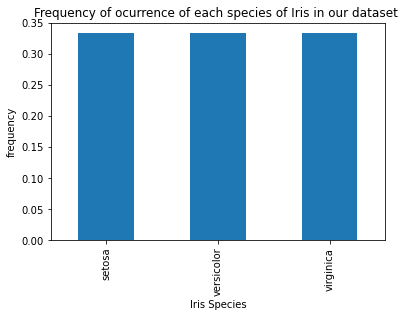

In [20]:
new_df['iris type'].value_counts(
    normalize= True).sort_index().plot.bar(
    title= 'Frequency of ocurrence of each species of Iris in our dataset ')
plt.ylabel('frequency')
plt.xlabel('Iris Species')
plt.xticks(ticks= [0,1,2],
          labels=['setosa', 'versicolor', 'virginica']);

In [21]:
# we have no issue of class imbalance in our dataset

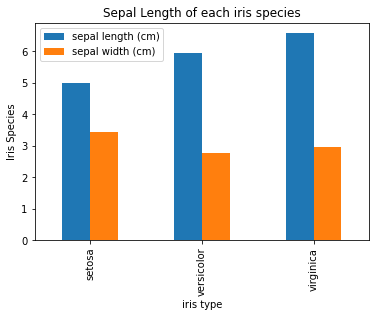

In [22]:
new_df[['sepal length (cm)', 'sepal width (cm)']].groupby(new_df['iris type']).mean().plot.bar(title= 'Sepal Length of each iris species')
plt.ylabel('Sepals')
plt.ylabel('Iris Species')
plt.xticks(ticks= [0,1,2],
          labels=['setosa', 'versicolor', 'virginica']);

Iris setosa has the smallest sepal length, and it has the largest sepal width

Iris virginica has the largest sepal length


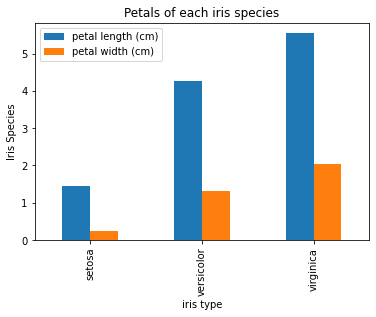

In [23]:
new_df[['petal length (cm)', 'petal width (cm)']].groupby(new_df['iris type']).mean().plot.bar(
    title= 'Petals of each iris species')
plt.ylabel('Petals')
plt.ylabel('Iris Species')
plt.xticks(ticks= [0,1,2],
          labels=['setosa', 'versicolor', 'virginica']);

In [24]:
new_df[['petal length (cm)', 'petal width (cm)']].groupby(new_df['iris type']).mean()

,petal length (cm),petal width (cm)
iris type,,
0,1.462,0.246
1,4.260,1.326
2,5.552,2.026


virginica has the largest petal length of the three species

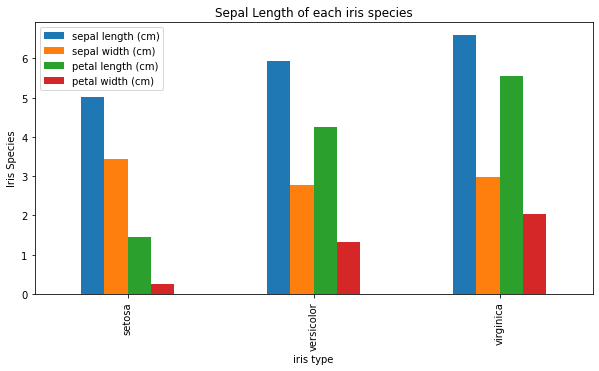

In [25]:
new_df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']].groupby(
    new_df['iris type']).mean().plot.bar(
    title= 'Sepal Length of each iris species', figsize=(10,5))
plt.ylabel('Sepal Length')
plt.ylabel('Iris Species')
plt.xticks(ticks= [0,1,2],
          labels=['setosa', 'versicolor', 'virginica']);

we can conclude that setosa is a small flower with large sepal

<AxesSubplot:>

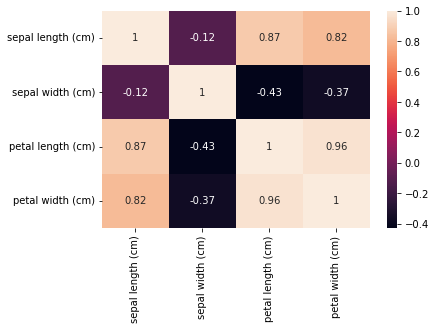

In [26]:
sns.heatmap(new_df.drop('iris type', axis=1).corr(), annot= True)

<AxesSubplot:>

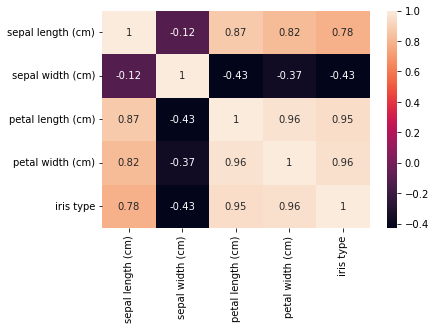

In [27]:
sns.heatmap(new_df.corr(), annot= True)

There is no preprocessing issue in our data except for petal length and petal width that have high correlation with each other. even tho leaving it will cause our model to score high, it is going to cause overfitting problem in our model so we have to check to see which of the columns has high correlation with the target variable and it was discovered that petal length has 1% less correlation so it has to be removed to stop overfitting of data 

# SPLIT THE DATA INTO TRAINING AND TEST SET

In [28]:
X= new_df.drop(['iris type', 'petal length (cm)'], axis=1)
y= new_df['iris type']

In [29]:
baseline_model= y.value_counts(normalize=True).max()
print (f'our baseline model is : {round(baseline_model, 2)*100}')

our baseline model is : 33.0


In [30]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
y_train.value_counts(normalize= True)

1    0.341667
0    0.333333
2    0.325000
Name: iris type, dtype: float64

# TRAIN AND TEST THE MODEL

In [32]:
model= LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
model.score(X_train, y_train)

0.95

In [35]:
model.score(X_test, y_test)

1.0

In [36]:
y_pred= model.predict(X_test)

In [37]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [38]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Conclusion
* Our model was able to capture all the iris species classes of the dataset and it was able to score 100% accuracy when tested
* We were not able to solve overfitting issues even after removing highly correlated values. that mean our model is too strong for the data
* Even tho the dataset was sorted ordinally, we were able to shuffle it so as to enable the model to study the trend in each species and give it equal chance of predicting